# Getting predicions

This notebook load and use the **NF**, **NNclass**, and **NNgauss** models

considering **missing features** in the _input dataset_ (halo properties: _mass_, _concentration_, _spin_, _age_, and $\delta_3$). 

In this notebook we provide an example of how to get the galaxy attributes (_stellar mass_, _color_, _sSFR_, and _radius_) 

given that the halo property $\delta_3$ is missing!

## Importing the libraries

In [1]:
from NF import NF
from NNgauss import NNgauss
#from NNclass import NNclass
import pandas as pd
import matplotlib.pyplot as plt
from missing_features import check_input_data

/Users/natalidesanti/env_pytorch/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


GPU is not available. Using CPU instead.


## Loading data

Let's get the missing input data:

In [2]:
input_dataset = pd.read_csv('data/subtest_tng300_inputs_missing_Delta3_h.csv')

In [3]:
input_dataset.head()

,M_h,C_h,S_h,z_h
0,11.230634,0.949239,0.102213,0.909091
1,11.193012,0.978603,0.057343,1.333333
2,11.963388,1.061022,0.012275,1.575758
3,11.788298,1.047671,0.069209,1.818182
4,11.464064,1.117278,0.067701,2.242424


Then, we just need to fill the missing part checking it:

In [4]:
input_dataset = check_input_data(input_dataset)

Missing features: ['Delta3_h']. Generating "fake" input features...


/Users/natalidesanti/env_pytorch/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.2.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


And not we have it!

Getting the target dataset now:

In [5]:
target_dataset = pd.read_csv('data/subtest_tng300_targets.csv')

In [6]:
target_dataset.head()

,smass,color,sSFR,radius
0,9.020804,0.441576,-9.636042,0.428343
1,8.825384,0.075232,-9.731375,0.266293
2,10.391277,1.130091,-12.301883,0.482415
3,10.166031,0.910177,-11.408447,0.774072
4,9.647124,1.016806,-10.740095,0.679863


## Selecting data

In [7]:
# Target properties
target_props = ['smass', 'color', 'sSFR', 'radius']

## Loading the models

The output shape is `(n_samples, n_simulations, n_dimensions)`


In [8]:
nngauss = NNgauss(target_props, trial = 45)
nf = NF(target_props, trial = 99)
#nnclass = NNclass(target_props, trial = 77)

## Getting the predictions

Sampling from the loaded models

In [9]:
nngauss_pred = nngauss.get_sample(input_dataset, n_samples = 10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [10]:
nf_pred = nf.get_sample(input_dataset, n_samples = 10)

# instance: 0


/Users/natalidesanti/env_pytorch/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.2.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [11]:
#nnclass_pred = nnclass.get_sample(input_data, 5, 2)

In [12]:
nf_pred.shape, nngauss_pred.shape

((10, 10, 4), (10, 10, 4))

## Linear comparison

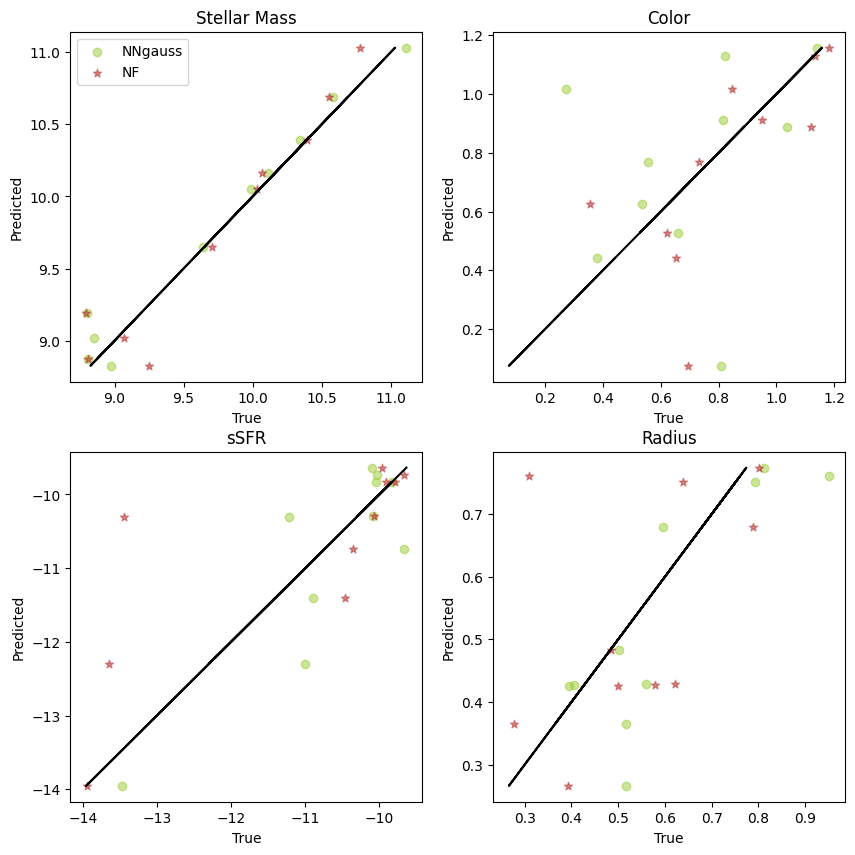

In [13]:
fig, axs = plt.subplots(2, 2, figsize = (10, 10), dpi = 100)

#Stellar Mass
nf_smass = nf_pred[0, :, 0]
nngauss_smass = nngauss_pred[0, :, 0]

axs[0, 0].set_title('Stellar Mass')
axs[0, 0].plot(target_dataset['smass'], target_dataset['smass'], color = 'black')
axs[0, 0].scatter(nngauss_smass, target_dataset['smass'], color = nngauss.color, label = nngauss.label, marker = nngauss.marker, alpha = 0.5)
axs[0, 0].scatter(nf_smass, target_dataset['smass'], color = nf.color, label = nf.label, marker = nf.marker, alpha = 0.5)
axs[0, 0].legend()
axs[0, 0].set_ylabel('Predicted')
axs[0, 0].set_xlabel('True')

#Color
nf_color = nf_pred[0, :, 1]
nngauss_color = nngauss_pred[0, :, 1]

axs[0, 1].set_title('Color')
axs[0, 1].plot(target_dataset['color'], target_dataset['color'], color = 'black')
axs[0, 1].scatter(nngauss_color, target_dataset['color'], color = nngauss.color, label = nngauss.label, marker = nngauss.marker, alpha = 0.5)
axs[0, 1].scatter(nf_color, target_dataset['color'], color = nf.color, label = nf.label, marker = nf.marker, alpha = 0.5)
axs[0, 1].set_ylabel('Predicted')
axs[0, 1].set_xlabel('True')

#sSFR
nf_sSFR = nf_pred[0, :, 2]
nngauss_sSFR = nngauss_pred[0, :, 2]

axs[1, 0].set_title('sSFR')
axs[1, 0].plot(target_dataset['sSFR'], target_dataset['sSFR'], color = 'black')
axs[1, 0].scatter(nngauss_sSFR, target_dataset['sSFR'], color = nngauss.color, label = nngauss.label, marker = nngauss.marker, alpha = 0.5)
axs[1, 0].scatter(nf_sSFR, target_dataset['sSFR'], color = nf.color, label = nf.label, marker = nf.marker, alpha = 0.5)
axs[1, 0].set_ylabel('Predicted')
axs[1, 0].set_xlabel('True')

#Radius
nf_radius = nf_pred[0, :, 3]
nngauss_radius = nngauss_pred[0, :, 3]

axs[1, 1].set_title('Radius')
axs[1, 1].plot(target_dataset['radius'], target_dataset['radius'], color = 'black')
axs[1, 1].scatter(nngauss_radius, target_dataset['radius'], color = nngauss.color, label = nngauss.label, marker = nngauss.marker, alpha = 0.5)
axs[1, 1].scatter(nf_radius, target_dataset['radius'], color = nf.color, label = nf.label, marker = nf.marker, alpha = 0.5)
axs[1, 1].set_ylabel('Predicted')
axs[1, 1].set_xlabel('True')

plt.savefig('results/from_missing-linear_comparison.png')